#Random Forest(랜덤 포레스트)

Random Forest는 정말 단순하게 생각하면 인기 투표방식이다 이제 Random Forest가 왜 인기투표 방식인지 양파까듯 하나씩 까보자



우선 랜덤포레스트는 Decision Tree의 Overfitting을 보완하기 위한 방법이다

Random Forest 는 전체 Feature 중 랜덤으로 일부 Feature만 선택해 하나의 결정 트리를 만들고 이러한 과정을 반복하여 수많은 의사 결정 트리(Decision Tree)가 모여서 생성된다

즉, 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것입니다.

(위와 같이 트리를 만드는 방법이 어디선가 본듯한 사람도 있을것이다 위와 같이 각 트리를 생성하는 방법을 가지고 배깅(bagging)이라고 한다 모르는 사람은 알아서 찾아보도록 하자^^)

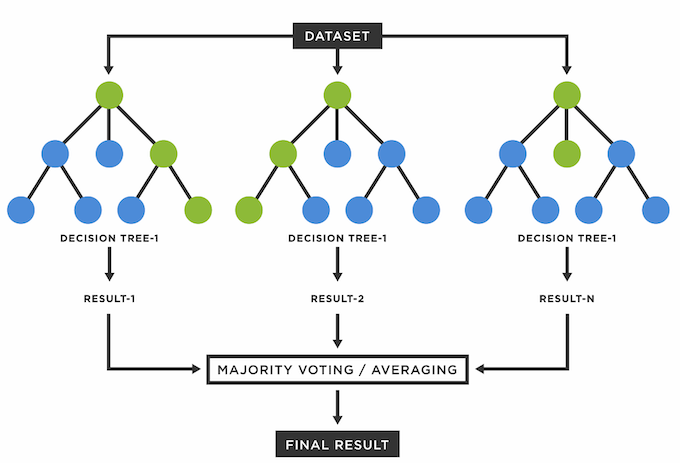

그리고 트리마다 하나의 예측 값을 내놓는데 이렇게 여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 정하게된다.

즉, 다수결의 원칙에 따르는 것이다.

이제 Random Forest가 왜 인기 투표방식이라고 했는지 좀 알겠는가

이렇게 해서 Decision Tree는 하나의 결과와 좁은 범위의 그룹을 갖지만, Forest는 더 많은 수의 그룹 및 결정으로 보다 정확한 결과를 보장한다.


이렇게 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)이라고 한다.
그냥 뭐 Random Forest가 앙상블 머신러닝 모델이다 라는것만 알아놓자


## 예제

* sklearn.ensemble 모듈에는 무작위 결정 트리를 기반으로 하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")



### Random Forests 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()


In [ ]:
# 붓꽃 데이터
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.13034133911132811 (+/- 0.005878776626460746)
avg score time: 0.011102724075317382 (+/- 0.0024010430933520894)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [ ]:
# 와인 데이터
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.14285750389099122 (+/- 0.0075932375768168045)
avg score time: 0.012892675399780274 (+/- 0.0019933864802982515)
avg test score: 0.9722222222222221 (+/- 0.03513641844631534)


In [ ]:
# 유방암 데이터
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.20943031311035157 (+/- 0.004963355656994127)
avg score time: 0.011178159713745117 (+/- 0.0005580662738845438)
avg test score: 0.9648812296227295 (+/- 0.021461473905943097)


###Random Forests 회귀

In [ ]:
boston = load_boston()
diabetes = load_diabetes()

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
# 보스턴 데이터
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.3181410789489746 (+/- 0.01701795998322206)
avg score time: 0.010539722442626954 (+/- 0.0008670456906919844)
avg test score: 0.6228059540317921 (+/- 0.22202131049024118)


In [ ]:
# 당뇨병 데이터
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.25759077072143555 (+/- 0.009220680035102204)
avg score time: 0.009812450408935547 (+/- 0.0004826669186405534)
avg test score: 0.419348751990906 (+/- 0.048169675811816894)
